In [1]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
%store -r hourly_data_df
%store -r data_df

# Duomenų žvalgomoji analize

Šio darbo metu analizuojami Lietuvos elektros kainos bei su elektros tiekimu, gamyba bei prekyba susiję duomenys. Duomenų šaltinis - Litgrid oficialus elektros tiekimo dabartinės bei istorinės informacijos puslapis. Originalūs duomenys pateikiami valandiniu dažnumu. Iš viso darbe analizuojami ir modeliuose pritaikomi šie duomenys:

In [3]:
hourly_data_df.describe()

Prognozuojama vėjo elektrinių gamyba  Vėjo elektrinių gamybos planas  \
count                          60506.000000                    69906.000000   
mean                             409.395986                      361.554316   
std                              479.251556                      461.150342   
min                                0.000000                        0.000000   
25%                               55.000000                       45.000000   
50%                              152.000000                      122.000000   
75%                              835.000000                      702.000000   
max                             1726.000000                     1900.000000   

       Faktinė vėjo elektrinių gamyba  \
count                    69993.000000   
mean                       364.191610   
std                        596.059884   
min                         -2.070000   
25%                         41.090000   
50%                        126.000000   
75%                        687.000000   
max                      99999.000000   

       Planuojama nacionalinė elektros energijos gamyba  \
count                                      69994.000000   
mean                                         375.479829   
std                                          204.928428   
min                                         -138.000000   
25%                                          225.000000   
50%                                          341.400000   
75%                                          492.000000   
max                                         1441.500000   

       Faktinė nacionalinė elektros energijos gamyba  \
count                                   69992.000000   
mean                                      382.284900   
std                                       205.194604   
min                                         0.000000   
25%                                       233.375000   
50%                                       350.490000   
75%                                       499.000000   
max                                      1653.222000   

       Prognozuojamas nacionalinis elektros energijos suvartojimas  \
count                                       69994.000000             
mean                                         1221.949428             
std                                           269.229444             
min                                           635.000000             
25%                                          1014.000000             
50%                                          1220.000000             
75%                                          1411.000000             
max                                          1986.000000             

       Planuojamas nacionalinis elektros energijos suvartojimas  \
count                                       69994.000000          
mean                                         1218.842065          
std                                           274.116922          
min                                            61.000000          
25%                                          1009.000000          
50%                                          1211.770000          
75%                                          1410.445000          
max                                          1971.470000          

       Faktinis nacionalinis Elektros energijos vartojimas  Nord Pool Lietuva  
count                                       69992.000000         70003.000000  
mean                                         1220.459889            42.784717  
std                                           268.900714            18.764388  
min                                             0.000000            -1.730000  
25%                                          1013.747500            31.000000  
50%                                          1218.000000            41.000000  
75%                                          1410.000000            52.000000  
max          

In [4]:
#TODO: Surinkti iki galo visus stulpelius

Kadangi duomenų bazėje duomenys pradėti kaupti ne nuo to pačio laiko, darbe analizuojamas laikotarpis nuo momento, kai egzistuoja visi duomenys t.y. nuo 2014 metų Sausio mėnesio. 

In [20]:
def nice_print_rows(rows):
    widths = [max(map(len, col)) for col in zip(*rows)]
    for row in rows:
         print("  ".join((val.ljust(width) for val, width in zip(row, widths))))

In [21]:
rows = []
for col in hourly_data_df.columns:
    existing_values = hourly_data_df[col].dropna()
    rows.append([col, str(existing_values.index[0]), str(existing_values.index[-1])])
nice_print_table(rows)

Prognozuojama vėjo elektrinių gamyba                         2014-01-31 00:00:00  2021-01-01 23:00:00
Vėjo elektrinių gamybos planas                               2013-01-01 00:00:00  2021-01-01 23:00:00
Faktinė vėjo elektrinių gamyba                               2013-01-01 00:00:00  2021-01-01 23:00:00
Planuojama nacionalinė elektros energijos gamyba             2013-01-01 00:00:00  2021-01-01 23:00:00
Faktinė nacionalinė elektros energijos gamyba                2013-01-01 00:00:00  2021-01-01 23:00:00
Prognozuojamas nacionalinis elektros energijos suvartojimas  2013-01-01 00:00:00  2021-01-01 23:00:00
Planuojamas nacionalinis elektros energijos suvartojimas     2013-01-01 00:00:00  2021-01-01 23:00:00
Faktinis nacionalinis Elektros energijos vartojimas          2013-01-01 00:00:00  2021-01-01 23:00:00
Nord Pool Lietuva                                            2013-01-01 00:00:00  2021-01-01 23:00:00


In [6]:
print('Seniausias laiko momentas: {}'.format(hourly_data_df.dropna().index[0]))
print('Naujausias laiko momentas: {}'.format(hourly_data_df.dropna().index[-1]))

Seniausias laiko momentas: 2014-01-31 00:00:00
Naujausias laiko momentas: 2021-01-01 23:00:00


In [7]:
hourly_data_df['Nord Pool Lietuva'].mean()

42.78471694070157

In [8]:
Analizuojant elektros kainos kitimą 2013-2021 m. laikotarpiu matome, kad 

SyntaxError: invalid syntax (<ipython-input-8-c53a400bfb7c>, line 1)

In [9]:
price_data_hour = go.Scatter(x=data_df.index,
                         y=data_df['Nord Pool Lietuva'],
                         name="Valandiniai duomenys")
layout = go.Layout(title='Elektros kaina', xaxis=dict(title='Laikas'),
                   yaxis=dict(title='(Elektros kaina EUR/MWh)'),
                   width=1400, height=500)
fig = go.Figure(data=[price_data_hour], layout=layout)
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

count    69796.000000
mean        42.341931
std         16.891268
min         -1.730000
25%         31.000000
50%         41.000000
75%         52.000000
max        149.990000
Name: Nord Pool Lietuva, dtype: float64

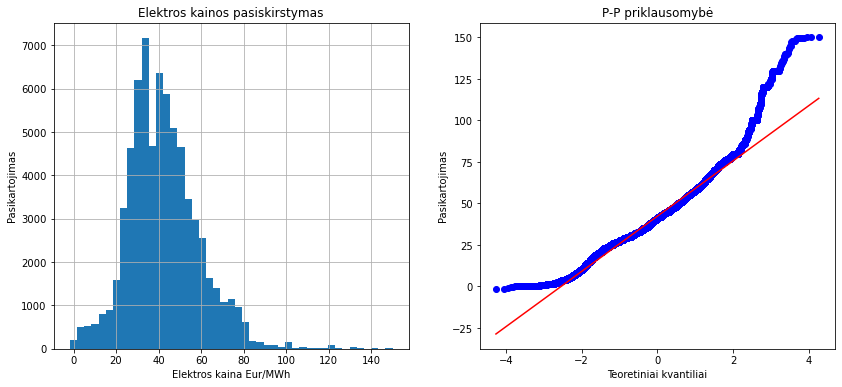

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

chart_data = hourly_data_df[hourly_data_df['Nord Pool Lietuva'] < 150]['Nord Pool Lietuva']
chart_data_daily = data_df[data_df['Nord Pool Lietuva'] < 150]['Nord Pool Lietuva']

plt.figure(figsize=(14,6))
ax1 = plt.subplot(1,2,1)
ax1.set_title('Elektros kainos pasiskirstymas')
ax1.set_xlabel('Elektros kaina Eur/MWh')
ax1.set_ylabel('Pasikartojimas')
chart_data.hist(bins=45)
ax2 = plt.subplot(1,2,2)
stats.probplot(chart_data, plot=plt);
ax2.set_title('P-P priklausomybė')
ax2.set_xlabel('Teoretiniai kvantiliai')
ax2.set_ylabel('Pasikartojimas')

plt.savefig('aprasomoji_dalis/distribution.png')

chart_data.describe().T

# Dekompozicija

In [11]:
import statsmodels.api as sm
import numpy as np

### Paros sezoniškumas

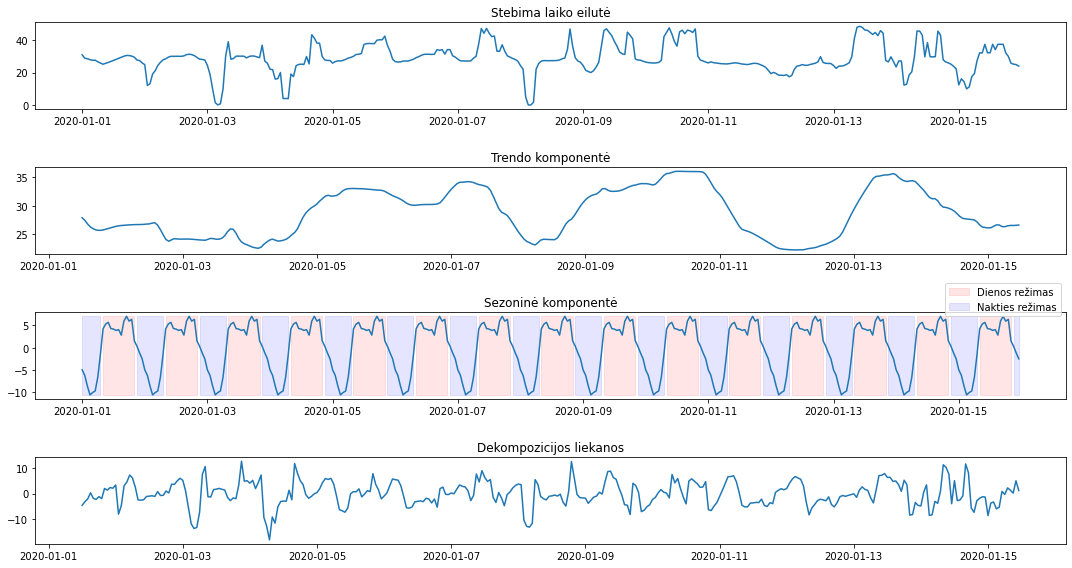

In [18]:
series = chart_data.loc['2020-01-01':'2020-01-15']
res_1 = sm.tsa.seasonal_decompose(series,
                                period=24,
                                model='additive')
fig, (ax0, ax1,ax2,ax3) = plt.subplots(4,1, figsize=(15,8))
ax0.plot(series)
ax1.plot(res_1.trend)
ax2.plot(res_1.seasonal)
ax3.plot(res_1.resid)

ax0.title.set_text('Stebima laiko eilutė')
ax1.title.set_text('Trendo komponentė')
ax2.title.set_text('Sezoninė komponentė')
ax3.title.set_text('Dekompozicijos liekanos')

fill_series = np.where((res_1.seasonal.index.hour >= 21) | (res_1.seasonal.index.hour <= 7),0,1)
f1 = ax2.fill_between(series.index, min(res_1.seasonal), max(res_1.seasonal), where=fill_series, color='r', alpha=0.1)
f2 = ax2.fill_between(series.index, min(res_1.seasonal), max(res_1.seasonal), where=1-fill_series, color='b', alpha=0.1)
ax2.legend(handles=[f1, f2], labels=["Dienos režimas", "Nakties režimas"], loc='center right', bbox_to_anchor=(1, 1.15))

fig.tight_layout() 
plt.savefig('aprasomoji_dalis/decompostion_24h.png')


### Savaitės sezoniškumas

3.6316111360362973
-9.78622371474632


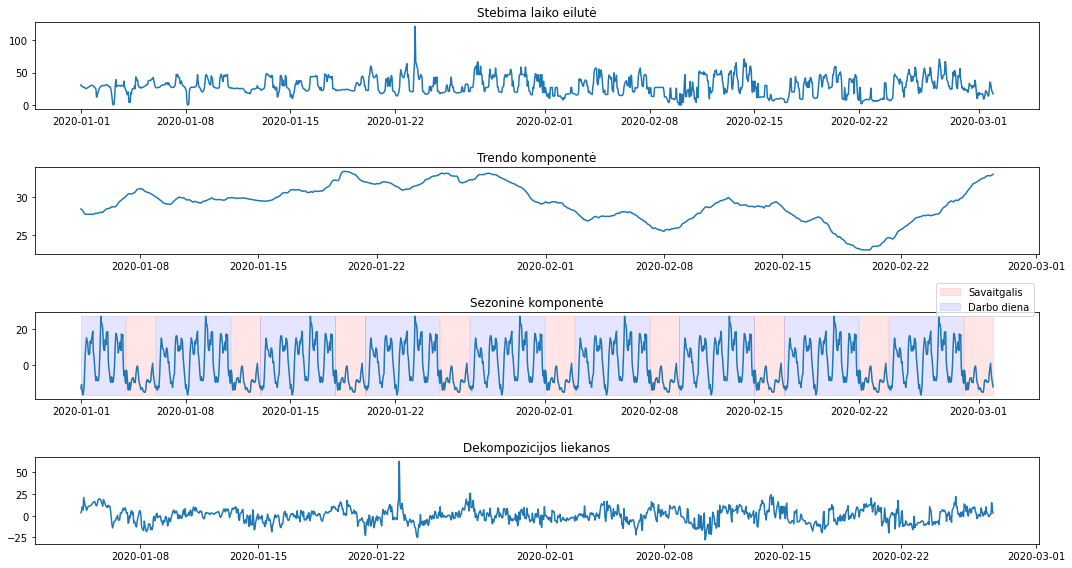

In [70]:
series_2_0 = chart_data.loc['2020-01-01':'2020-03-01']
res_2_0 = sm.tsa.seasonal_decompose(series_2_0,
                                period=24,
                                model='additive')
series = series_2_0#res_2_0.resid.dropna()
res_2 = sm.tsa.seasonal_decompose(series,
                                period=24*7,
                                model='additive')
fig, (ax0, ax1,ax2,ax3) = plt.subplots(4,1, figsize=(15,8))
ax0.plot(series)
ax1.plot(res_2.trend)
ax2.plot(res_2.seasonal)
ax3.plot(res_2.resid)

ax0.title.set_text('Stebima laiko eilutė')
ax1.title.set_text('Trendo komponentė')
ax2.title.set_text('Sezoninė komponentė')
ax3.title.set_text('Dekompozicijos liekanos')

fill_series = np.where((res_2.seasonal.index.weekday) < 5,0,1)
f1 = ax2.fill_between(series.index, min(res_2.seasonal), max(res_2.seasonal), where=fill_series, color='r', alpha=0.1)
f2 = ax2.fill_between(series.index, min(res_2.seasonal), max(res_2.seasonal), where=1-fill_series, color='b', alpha=0.1)
ax2.legend(handles=[f1, f2], labels=["Savaitgalis", "Darbo diena"], loc='center right', bbox_to_anchor=(1, 1.15))

fig.tight_layout() 
plt.savefig('aprasomoji_dalis/decompostion_7d.png')

avg_work_day = res_2.seasonal[res_2.seasonal.index.weekday < 5].mean()
avg_weekend = res_2.seasonal[res_2.seasonal.index.weekday > 5].mean()

print(avg_work_day)
print(avg_weekend)

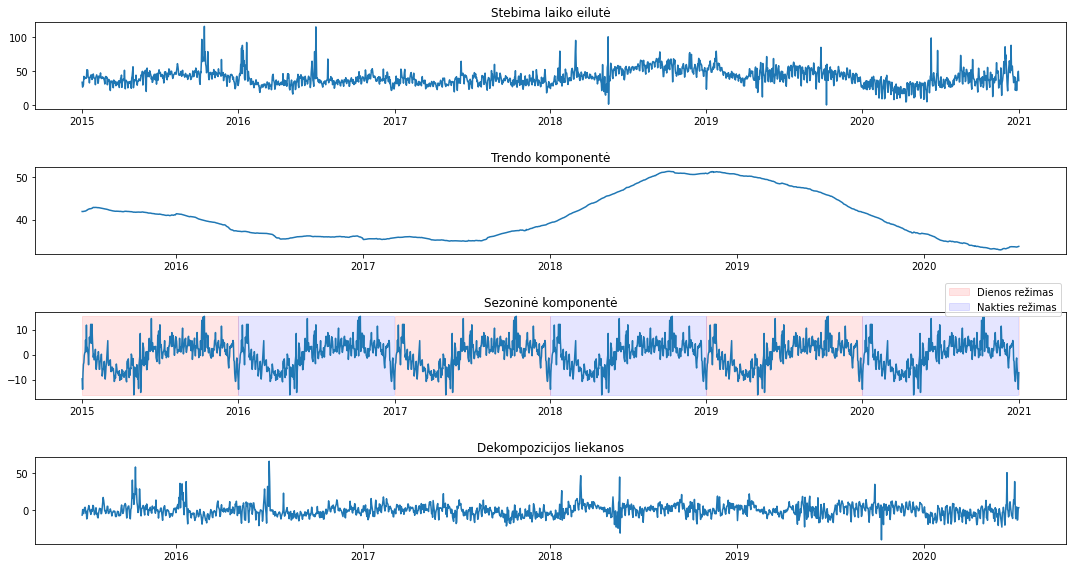

In [75]:
series = chart_data_daily.loc['2010-01-01':'2021-01-01']
res_1 = sm.tsa.seasonal_decompose(series,
                                period=365,
                                model='additive')
fig, (ax0, ax1,ax2,ax3) = plt.subplots(4,1, figsize=(15,8))
ax0.plot(series)
ax1.plot(res_1.trend)
ax2.plot(res_1.seasonal)
ax3.plot(res_1.resid)

ax0.title.set_text('Stebima laiko eilutė')
ax1.title.set_text('Trendo komponentė')
ax2.title.set_text('Sezoninė komponentė')
ax3.title.set_text('Dekompozicijos liekanos')

fill_series = np.where((res_1.seasonal.index.year % 2 == 0),0,1)
f1 = ax2.fill_between(series.index, min(res_1.seasonal), max(res_1.seasonal), where=fill_series, color='r', alpha=0.1)
f2 = ax2.fill_between(series.index, min(res_1.seasonal), max(res_1.seasonal), where=1-fill_series, color='b', alpha=0.1)
ax2.legend(handles=[f1, f2], labels=["Dienos režimas", "Nakties režimas"], loc='center right', bbox_to_anchor=(1, 1.15))

fig.tight_layout() 
plt.savefig('aprasomoji_dalis/decompostion_24h.png')
